In [1]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from catboost import CatBoost
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.decomposition import PCA
from sklearn import linear_model

In [3]:
df = pd.read_csv("heart.csv")

In [4]:
target_col = "target"
X = df.loc[:, df.columns != target_col]
y = df.loc[:, target_col]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [19]:
model_cb = CatBoostClassifier(task_type='GPU', iterations=200, 
                              random_state = 700, 
                              eval_metric="F1")

In [20]:
model_cb.fit(X_train, y_train, plot=True, 
             
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.143156
0:	learn: 0.8188105	test: 0.7964072	best: 0.7964072 (0)	total: 7.22ms	remaining: 1.44s
1:	learn: 0.8721591	test: 0.8213166	best: 0.8213166 (1)	total: 13.7ms	remaining: 1.35s
2:	learn: 0.8676056	test: 0.8206687	best: 0.8213166 (1)	total: 20.2ms	remaining: 1.32s
3:	learn: 0.8638239	test: 0.8343195	best: 0.8343195 (3)	total: 26.7ms	remaining: 1.31s
4:	learn: 0.8913343	test: 0.8605341	best: 0.8605341 (4)	total: 33.1ms	remaining: 1.29s
5:	learn: 0.8910345	test: 0.8554217	best: 0.8605341 (4)	total: 39.5ms	remaining: 1.28s
6:	learn: 0.9019074	test: 0.8750000	best: 0.8750000 (6)	total: 45.9ms	remaining: 1.27s
7:	learn: 0.9105691	test: 0.8823529	best: 0.8823529 (7)	total: 52.5ms	remaining: 1.26s
8:	learn: 0.9159892	test: 0.8908555	best: 0.8908555 (8)	total: 59.1ms	remaining: 1.25s
9:	learn: 0.9241192	test: 0.9037901	best: 0.9037901 (9)	total: 65.5ms	remaining: 1.24s
10:	learn: 0.9316940	test: 0.9144543	best: 0.9144543 (10)	total: 71.9ms	remaining: 1.24s
11:	learn: 

In [8]:
y_pred = model_cb.predict(X_test)

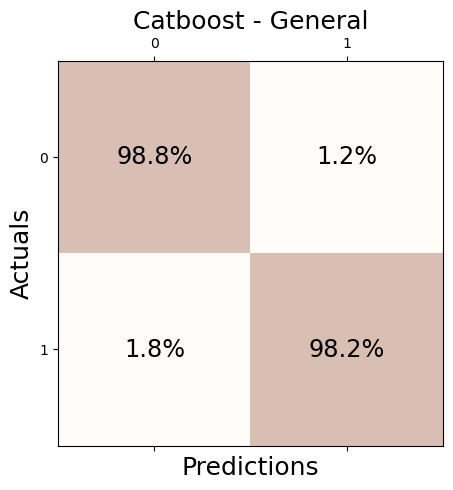

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test, y_pred.round(0).astype(int),normalize='true')
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Catboost - General', fontsize=18)
plt.show()

In [22]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       171
           1       0.99      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339



In [11]:
ndf = df[['age','sex', 'trestbps','fbs',
       'restecg','thalach', 'oldpeak','slope']]

In [12]:
target_col = "target"
X = ndf.loc[:, ndf.columns ]
y = df.loc[:, target_col]

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.33, 
                                                    random_state=42)

In [14]:
model_cb = CatBoostClassifier(task_type='GPU', iterations=200, 
                              random_state = 700, 
                              eval_metric="F1")

In [15]:
model_cb.fit(X_train, y_train, plot=True, 
             eval_set=(X_test, y_test))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

Learning rate set to 0.143156
0:	learn: 0.8188105	test: 0.7964072	best: 0.7964072 (0)	total: 6.71ms	remaining: 1.33s
1:	learn: 0.8721591	test: 0.8213166	best: 0.8213166 (1)	total: 12.6ms	remaining: 1.25s
2:	learn: 0.8676056	test: 0.8206687	best: 0.8213166 (1)	total: 18.5ms	remaining: 1.22s
3:	learn: 0.8638239	test: 0.8343195	best: 0.8343195 (3)	total: 24.5ms	remaining: 1.2s
4:	learn: 0.8913343	test: 0.8605341	best: 0.8605341 (4)	total: 30.4ms	remaining: 1.19s
5:	learn: 0.8910345	test: 0.8554217	best: 0.8605341 (4)	total: 39.7ms	remaining: 1.28s
6:	learn: 0.9019074	test: 0.8750000	best: 0.8750000 (6)	total: 50.5ms	remaining: 1.39s
7:	learn: 0.9105691	test: 0.8823529	best: 0.8823529 (7)	total: 56.5ms	remaining: 1.35s
8:	learn: 0.9159892	test: 0.8908555	best: 0.8908555 (8)	total: 62.4ms	remaining: 1.32s
9:	learn: 0.9241192	test: 0.9037901	best: 0.9037901 (9)	total: 69.1ms	remaining: 1.31s
10:	learn: 0.9316940	test: 0.9144543	best: 0.9144543 (10)	total: 75.1ms	remaining: 1.29s
11:	learn: 0

In [16]:
y_pred = model_cb.predict(X_test)

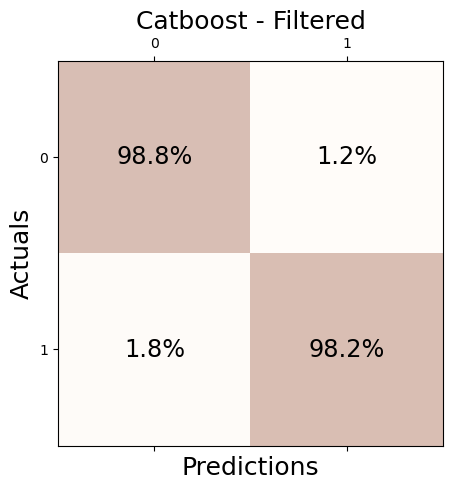

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
# Calculate the confusion matrix
#
conf_matrix = confusion_matrix(y_test, y_pred.round(0).astype(int),normalize='true')
# Print the confusion matrix using Matplotlib
#
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=str(round(conf_matrix[i, j]*100,1))+'%', va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Catboost - Filtered', fontsize=18)
plt.show()

In [18]:
from sklearn.metrics import classification_report
classification_report = classification_report(y_test, y_pred)
print(classification_report)

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       171
           1       0.99      0.98      0.99       168

    accuracy                           0.99       339
   macro avg       0.99      0.99      0.99       339
weighted avg       0.99      0.99      0.99       339

